
###**Apply advanced statistical and analytical methods to solve complex problems**
1. *Implement time series analysis for forecasting trends and seasonality.*
2. *Perform sentiment analysis or text mining on
unstructured data.*
3. *Explore clustering or classification techniques for segmentation and pattern recognition

Deepika

Loading and examining the dataset

In [4]:
import pandas as pd

In [5]:
# Load the dataset
data =  pd.read_csv("/content/disney_plus_titles.csv")

In [6]:
# Display column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [7]:
# Display the first few rows of the dataset
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


In [8]:
# Displaying the column names
data.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [9]:
# Checking for misisng values
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
#importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from textblob import TextBlob

Time Series Analysis

In [11]:
# Convert 'release_year' to datetime if it's not already
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y', errors='coerce')

In [12]:
# Drop rows with missing release_year
data= data.dropna(subset=['release_year'])

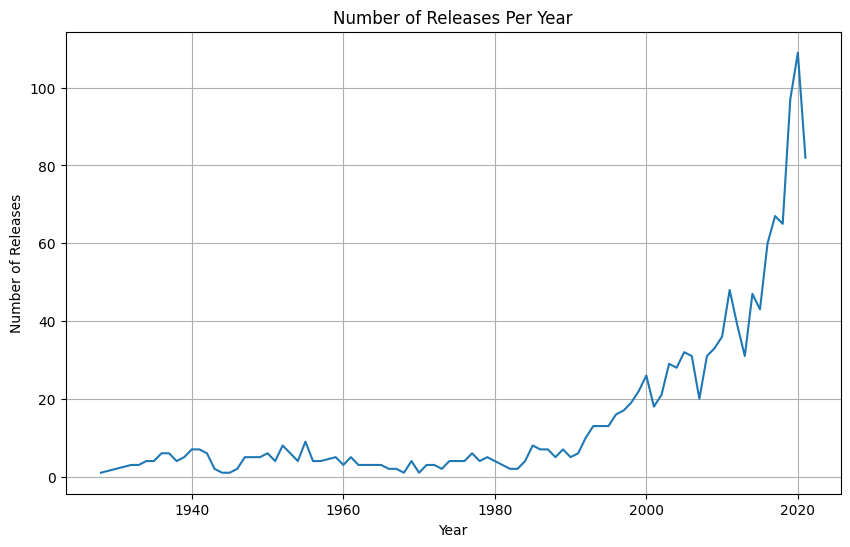

In [13]:
# Count releases per year
releases_per_year = data['release_year'].dt.year.value_counts().sort_index()

# Plot the number of releases per year
plt.figure(figsize=(10, 6))
releases_per_year.plot(kind='line')
plt.title('Number of Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

In [14]:
# Perform sentiment analysis on the 'description' column
data['description'] = data['description'].astype(str)

In [15]:
# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

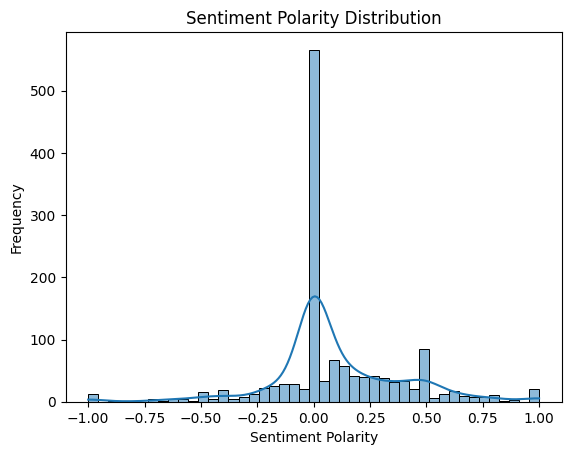

In [16]:
# Apply sentiment analysis
data['sentiment'] = data['description'].apply(lambda x: get_sentiment(x)[0])
data['subjectivity'] = data['description'].apply(lambda x: get_sentiment(x)[1])

# Plot sentiment distribution
sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Clustering

In [17]:
# Vectorize the 'description' column for clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['description'])

In [18]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


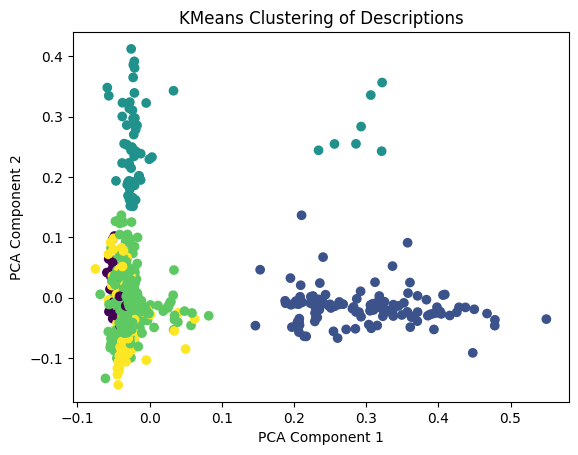

In [19]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [20]:
# Display the first few rows and column names again to choose relevant features
print(data.head())
print(data.columns)

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

In [21]:
# Select relevant features for the pair plot
# Ensure 'release_year' is a numeric type for plotting
data['release_year'] = data['release_year'].dt.year

# Choose a subset of relevant columns for visualization
# Note: Modify column names based on actual dataset structure
selected_features = ['release_year', 'rating', 'cluster']

# Filter the DataFrame to include only selected features
data_selected = data[selected_features].dropna()

# Convert categorical data to numeric if necessary (e.g., rating)
# Assuming 'rating' is categorical, we can encode it numerically
data_selected['rating'] = data_selected['rating'].astype('category').cat.codes

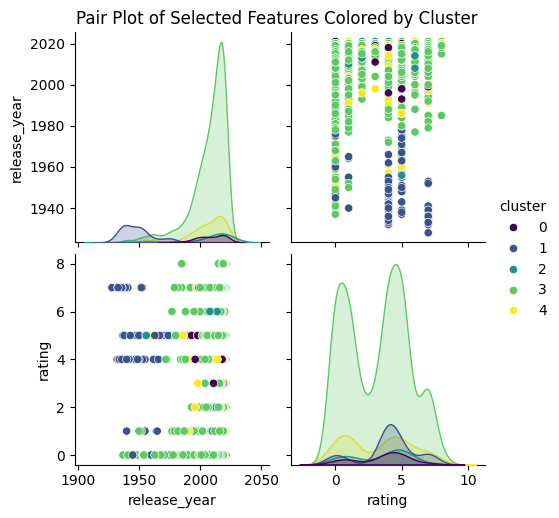

In [22]:
# Create the pair plot
sns.pairplot(data_selected, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features Colored by Cluster', y=1.02)
plt.show()